In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.segmentation as seg
from skimage import util

In [2]:
%store -r dicom_array

In [3]:
dicom_array = dicom_array / dicom_array.max()
dicom_array = 255 * dicom_array
img = dicom_array.astype('uint8')

In [4]:
def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    
    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c,r]).T

In [5]:
points = circle_points(200, [250,250], 170)[:-1]

In [6]:
snake = seg.active_contour(img, points)

In [7]:
print(points.shape)
print(snake.shape)

(199, 2)
(199, 2)


In [8]:
def img_ax(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    return fig, ax

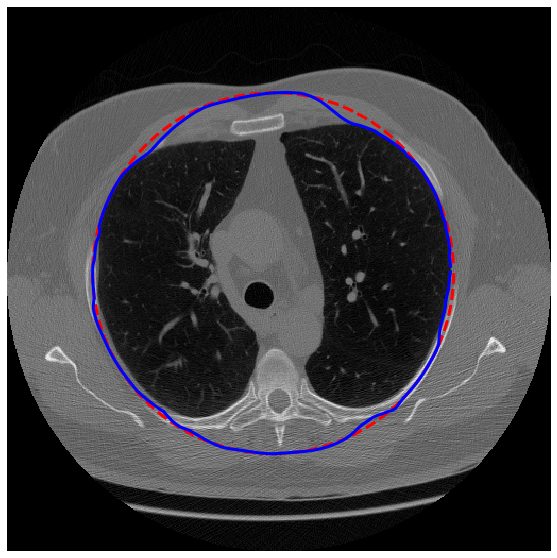

In [9]:
fig, ax = img_ax(img)
ax.plot(points[:,0], points[:,1], '--r', lw=3)
ax.plot(snake[:,0], snake[:,1], '-b', lw=3)

In [10]:
snake = seg.active_contour(img, points, alpha=0.2,beta=0.3, w_edge=1.3)

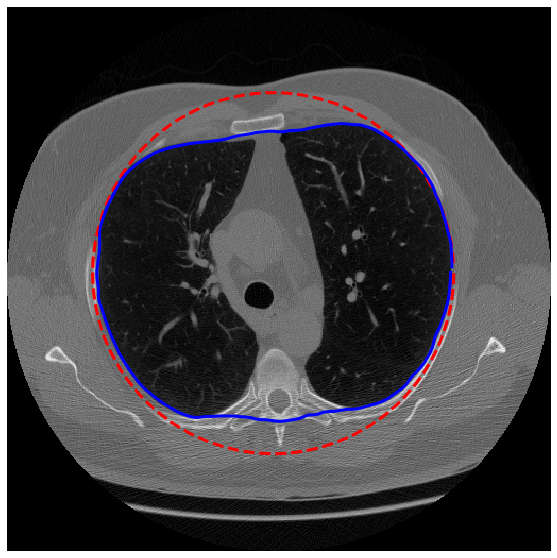

In [11]:
fig, ax = img_ax(img)
ax.plot(points[:,0], points[:,1], '--r', lw=3)
ax.plot(snake[:,0], snake[:,1], '-b', lw=3)

In [12]:
img.shape

(512, 512)

In [13]:
snake.shape

(199, 2)

### Random Walker

In [14]:
labels = np.zeros(img.shape, dtype=np.uint8)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23a19559a88>)

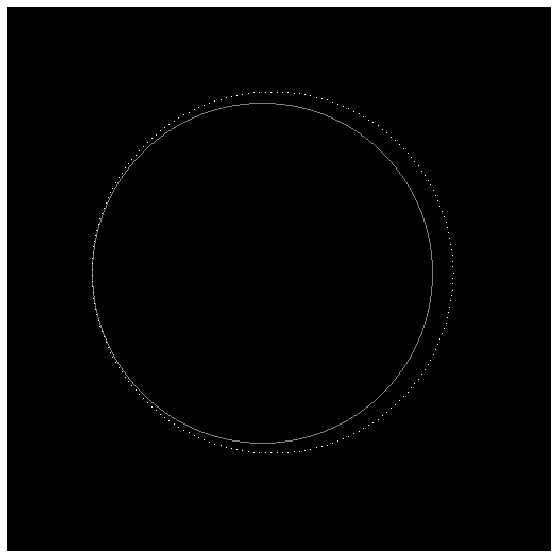

In [15]:
from skimage import draw

indices  = draw.circle_perimeter(250,240, 160)
labels[indices]  = 1

labels[points[:,1].astype(np.int), points[:,0].astype(np.int)] = 2
img_ax(labels)

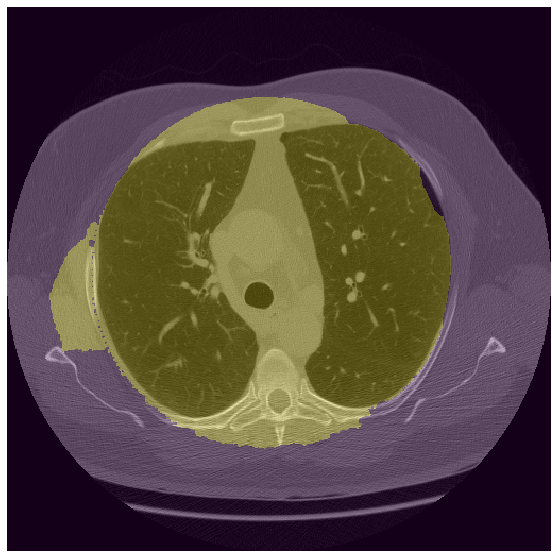

In [16]:
seg = seg.random_walker(img, labels, beta=1000)
fig, axis = img_ax(img)
axis.imshow(seg==1, alpha=0.3)

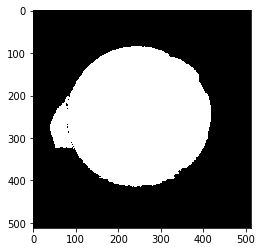

In [17]:
plt.imshow(~seg, cmap='gray')

In [18]:
test = seg.copy()

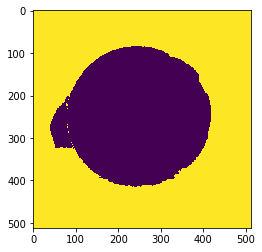

In [19]:
plt.imshow(test)

In [20]:
test[100, 50]

2

In [21]:
c = np.where(test>1)

In [22]:
c

(array([  0,   0,   0, ..., 511, 511, 511], dtype=int64),
 array([  0,   1,   2, ..., 509, 510, 511], dtype=int64))

In [23]:
img[c] = 1

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23a19a9f208>)

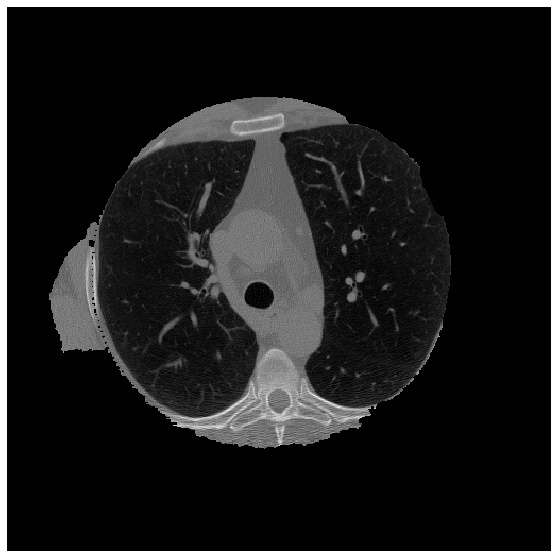

In [24]:
img_ax(img)